In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
data_set = datasets.load_boston()

X = data_set.data[:, [5, 9]]
Y = data_set.target
print(X.shape)
print(Y.shape)


(506, 2)
(506,)


### Features of boston dataset

0 CRIM - per capita crime rate by town

1 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

2 INDUS - proportion of non-retail business acres per town.

3 CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

4 NOX - nitric oxides concentration (parts per 10 million)

5 RM - average number of rooms per dwelling

6 AGE - proportion of owner-occupied units built prior to 1940

7 DIS - weighted distances to fiveaBoston employment centres

8 RAD - index of accessibility to radial highways

9 TAX - full-value property-tax rate per \$10,000

10 PTRATIO - pupil-teacher ratio by town 

11 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

12 LSTAT - % lower status of the population

label MEDV - Median value of owner-occupied homes in \$1000's

c:\users\eniac\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


Text(0.5, 0, 'MEDV')

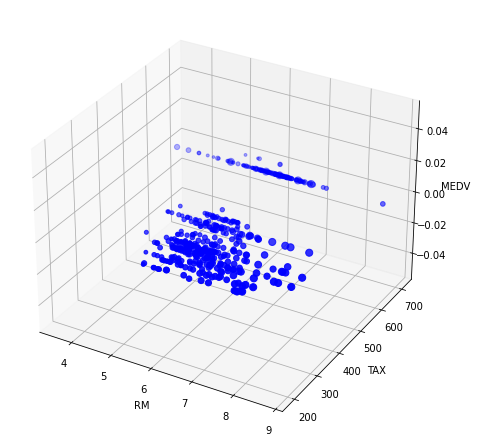

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

plt.scatter(X[:, 0], X[:, 1], Y, c = 'blue' )

ax.set_xlabel('RM')
ax.set_ylabel('TAX')
ax.set_zlabel('MEDV')

In [5]:
class AdelineRegressor:
    def __init__(self):
        pass
    
    def fit(self, X_tarin, y_tarin):
        self.w = np.matmul(inv(np.matmul(X_tarin.T, X_tarin)), np.matmul(X_tarin.T, y_tarin))
        
    def predict(self, X_test):
        y_pred = np.matmul(X_test, self.w)
        return y_pred
    
    def evaluate(self, X_test, y_test, metric):
        y_pred = np.matmul(X_test, self.w)
        y_pred = np.round(y_pred, 1)
        
        if metric == 'MSE':
            squared_error = (y_pred - y_test) ** 2
            squared_error = np.round(squared_error, 1)
            average = np.mean(squared_error)
            
        if metric == 'MAE':
            absolute_error = np.abs(y_pred - y_test)
            absolute_error = np.round(absolute_error, 1)
            average = np.mean(absolute_error)
            
        return average

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [7]:
model = AdelineRegressor()
model.fit(X_train, Y_train)
print(model.w)


[ 5.06651783 -0.02121615]


In [8]:
evaluate = model.evaluate(X_test, Y_test, metric = 'MSE')
print('mse', evaluate)
evaluate = model.evaluate(X_test, Y_test, metric = 'MAE')
print('mae', evaluate)

mse 26.13725490196078
mae 4.152941176470588


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
y_pred = np.round(y_pred, 1)

print('mse', mean_squared_error(y_pred, Y_test))
print('mae', mean_absolute_error(y_pred, Y_test))

mse 26.139019607843135
mae 4.152941176470588


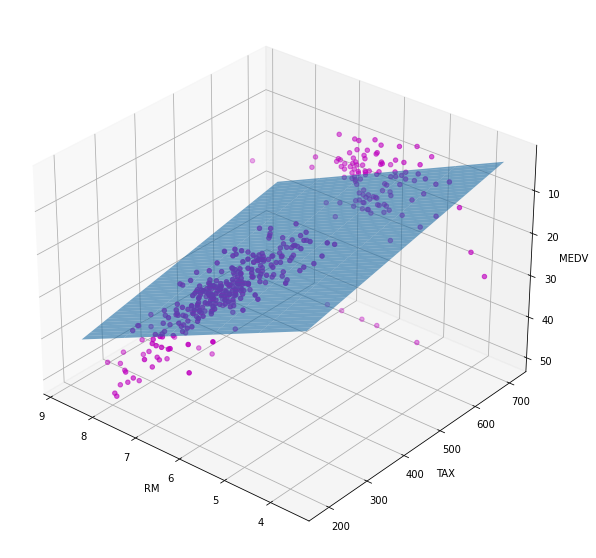

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

x_range = np.arange(X_train[:,0].min(), X_train[:,0].max())
y_range = np.arange(X_train[:,1].min(), X_train[:,1].max())
x, y = np.meshgrid(x_range, y_range)

w = model.w
z = x * w[0] + y * w[1]
from matplotlib import cm
surf  = ax.plot_surface(x, y, z, alpha = 0.6)
ax.scatter(X_train[:,0], X_train[:,1], Y_train, c='m', marker='o')

ax.set_xlabel('RM')
ax.set_ylabel('TAX')
ax.set_zlabel('MEDV')
ax.view_init(-150, 50)

plt.show()

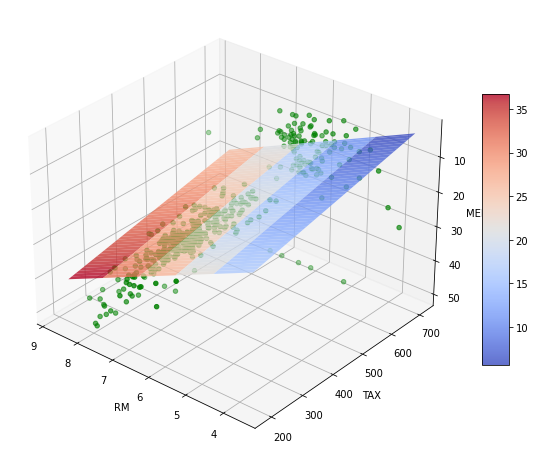

In [11]:
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

x_range = np.arange(X_train[:,0].min(), X_train[:,0].max())
y_range = np.arange(X_train[:,1].min(), X_train[:,1].max())
x, y = np.meshgrid(x_range, y_range)

w = model.w
z = x * w[0] + y * w[1]

surf  = ax.plot_surface(x, y, z, cmap=cm.coolwarm, alpha = 0.8)
ax.scatter(X_train[:,0], X_train[:,1], Y_train, c='g', marker='o')

ax.set_xlabel('RM')
ax.set_ylabel('TAX')
ax.set_zlabel('MEDV')
ax.view_init(-150, 50)

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()